In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt

In [2]:
#Asset 1
mu_1=0.05
sigma_1=0.15
rho_12=0.5
b=0.03

#Asset 2
mu_2=0.15
sigma_2=0.25
#b_2=b

R_f=0.02
gamma = 1

def cov_12(rho_12,sigma_2):
    cov_12=rho_12*sigma_1*sigma_2
    return cov_12

In [3]:
def X_NS (X_01,rho_12,sigma_2) :
    U = (mu_2 + b - R_f - gamma*X_01*cov_12(rho_12,sigma_2))/(gamma*sigma_2**2)
    return U

def X_NB (X_01,rho_12,sigma_2) :
    U = (mu_2 - b - R_f - gamma*X_01*cov_12(rho_12,sigma_2))/(gamma*sigma_2**2)
    return U

def X_SN (X_02,rho_12,sigma_2) :
    U = (mu_1 + b - R_f - gamma*X_02*cov_12(rho_12,sigma_2))/(gamma*sigma_1**2)
    return U


def X_BN (X_02,rho_12,sigma_2) :
    U = (mu_1 - b - R_f - gamma*X_02*cov_12(rho_12,sigma_2))/(gamma*sigma_1**2)
    return U


In [4]:
def trade_optimal (rho_12,sigma_2) :
    X_BB = np.ones((2,1))
    X_BS = np.ones((2,1))
    X_SB = np.ones((2,1))
    X_SS = np.ones((2,1))

    Sigma = np.array([sigma_1**2, cov_12(rho_12,sigma_2),cov_12(rho_12,sigma_2), sigma_2**2]).reshape((2,2))
    mu = np.array([mu_1,mu_2]).reshape((2,1))
    b_1 = np.array([b,b]).reshape((2,1))
    b_2 = np.array([b,-b]).reshape((2,1))
    b_3 = np.array([-b,b]).reshape((2,1))
    b_4 = np.array([-b,-b]).reshape((2,1))
    R_f_= np.array([R_f,R_f]).reshape((2,1))

    X_BB = np.linalg.inv(Sigma)@(-b_1 + mu - R_f_)
    X_BS = np.linalg.inv(Sigma)@(-b_2 + mu - R_f_)
    X_SB = np.linalg.inv(Sigma)@(-b_3 + mu - R_f_)
    X_SS = np.linalg.inv(Sigma)@(-b_4 + mu - R_f_)

    X_01_NS = np.linspace(X_BS[0],X_SS[0],1000).reshape((1000,1))
    X_01_NB = np.linspace(X_BB[0],X_SB[0],1000).reshape((1000,1))
    X_02_SN = np.linspace(X_SB[1],X_SS[1],1000).reshape((1000,1))
    X_02_BN = np.linspace(X_BB[1],X_BS[1],1000).reshape((1000,1))

    plt.plot(X_BB[0],X_BB[1],'bo')
    plt.plot(X_BS[0],X_BS[1],'bo')
    plt.plot(X_SB[0],X_SB[1],'bo')
    plt.plot(X_SS[0],X_SS[1],'bo')


    Delta = 0.4
    xmin = X_BS[0]-Delta
    xmax = X_SB[0]+Delta
    ymin = X_SB[1]-Delta
    ymax = X_BS[1]+Delta

    Np = 100
    BB1_x = np.linspace(xmin,X_BB[0],Np)
    BB1_y = X_BB[1]*np.ones((Np,1))
    BB2_x = X_BB[0]*np.ones((Np,1))
    BB2_y = np.linspace(ymin,X_BB[1],Np)

    SS1_x = np.linspace(X_SS[0],xmax,Np)
    SS1_y = X_SS[1]*np.ones((Np,1))
    SS2_x = X_SS[0]*np.ones((Np,1))
    SS2_y = np.linspace(X_SS[1],ymax,Np)

    BS1_x = np.linspace(xmin,X_BS[0],Np)
    BS1_y = X_BS[1]*np.ones((Np,1))
    BS2_x = X_BS[0]*np.ones((Np,1))
    BS2_y = np.linspace(X_BS[1],ymax,Np)

    SB1_x = np.linspace(X_SB[0],xmax,Np)
    SB1_y = X_SB[1]*np.ones((Np,1))

    SB2_x = X_SB[0]*np.ones((Np,1))
    SB2_y = np.linspace(ymin,X_SB[1],Np)

    plt.plot(BB1_x,BB1_y,'b-')
    plt.plot(BB2_x,BB2_y,'b-')
    plt.plot(SS1_x,SS1_y,'b-')
    plt.plot(SS2_x,SS2_y,'b-')
    plt.plot(BS1_x,BS1_y,'b-')
    plt.plot(BS2_x,BS2_y,'b-')
    plt.plot(SB1_x,SB1_y,'b-')
    plt.plot(SB2_x,SB2_y,'b-')
    
    plt.plot(X_01_NS,X_NS(X_01_NS,rho_12,sigma_2),'c-',label='selling asset 2 and not trading asset 1')
    plt.plot(X_01_NB,X_NB(X_01_NB,rho_12,sigma_2),'r-',label='Buying asset 2 and not trading asset 1')
    plt.plot(X_SN(X_02_SN,rho_12,sigma_2),X_02_SN,'g-',label='selling asset 1 and not trading asset 2')
    plt.plot(X_BN(X_02_BN,rho_12,sigma_2),X_02_BN,'y-',label='Buying asset 1 and not trading asset 2')
    plt.legend(loc="upper right")

    plt.xlabel('X_01')
    plt.ylabel('X_02')
    plt.show()

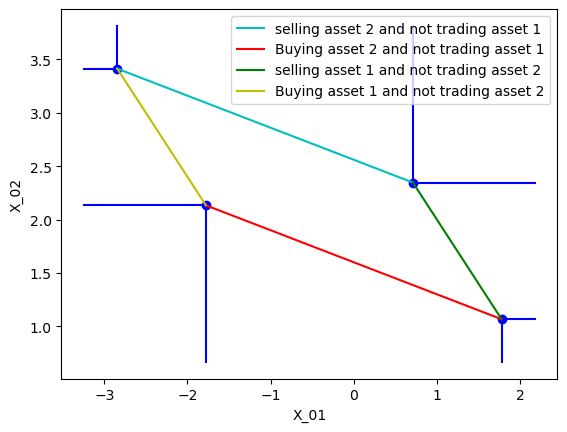

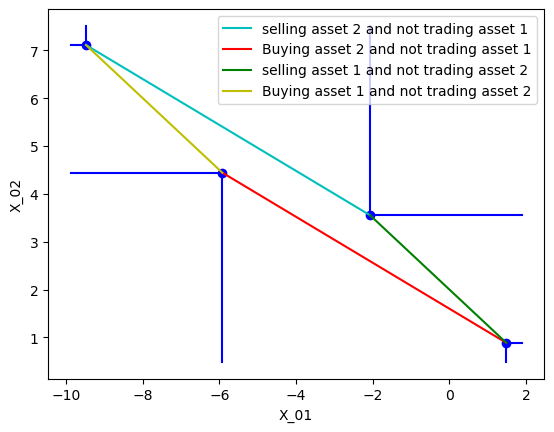

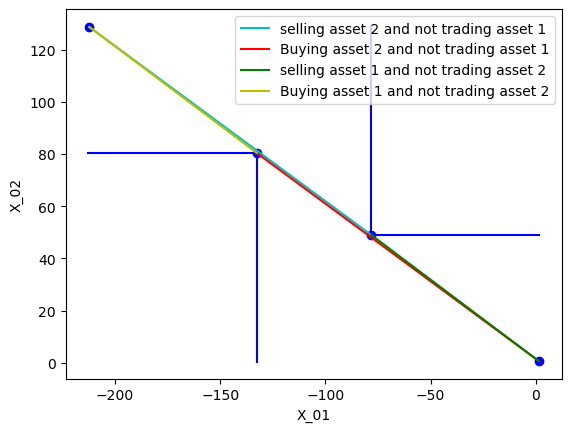

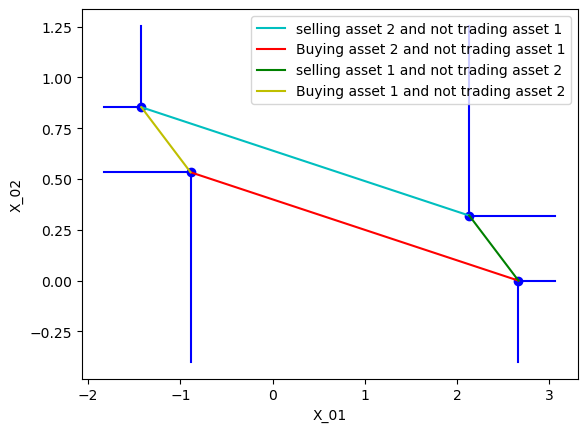

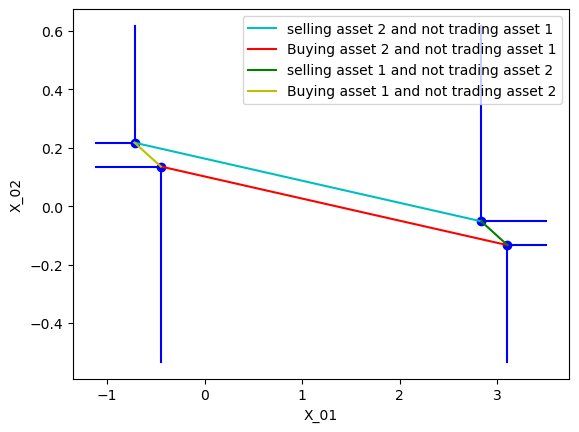

In [10]:
# question b:
trade_optimal (rho_12,sigma_2)

#rho higher:
trade_optimal (0.8,sigma_2)
trade_optimal (0.99,sigma_2)

#higher sigma_2:
trade_optimal (rho_12,0.5)
trade_optimal (rho_12,0.99)